<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch03_05_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EC%82%B0%ED%8F%AC%ED%86%B5%EA%B3%84%EB%9F%89_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.05. 기초통계 - 산포통계량
---
* 날짜: 2022-05-09
* 이름: 김민규

## 학습내용
    * 산포 통계량
      - 분산
      - 표준편차
      - 변동계수
      - 스케일링
      - 범위와 사분위 범위

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  산포 통계
---

* 산포란 데이터가 얼마나 퍼져있는지를 의미

* 따라서 산포 통계량이란 데이터의 산포를 나타내는 통계량이라 할 수 있다.

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```


* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [7]:
# 넘파이 랜덤 시드 0으로 설정
np.random.normal(0, 1, 1000)
# 넘파이 배열 `a1`로 바인딩
a1 = np.random.normal(0, 1, 1000)
# 판다스 시리즈 `s1`로 바인딩
s1 = pd.Series(a1)

* 평균 0, 표준편차 3인 정규분포 데이터 1000개를 생성하기

In [12]:
# 넘파이 랜덤 시드 0으로 설정
np.random.normal(0,3,1000)
# 넘파이 배열 `a3`로 바인딩
a3 = np.random.normal(0,3,1000)
# 판다스 시리즈 `s3`로 바인딩
s3 = pd.Series(a3)

* `a1`와 `a3`의 분포 그리기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


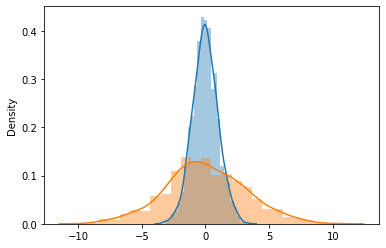

In [15]:
print(sns.distplot(a1))
print(sns.distplot(a3))

### **| 분산**

\begin{align}
var(x) = \frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1} 
\end{align}
\begin{align}
 & \\
 & x_i :? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.var(a, ddof) 
a.var(ddof)
s.var(ddof)
```

* `a1`과 `a3`의 분산을 계산

In [23]:
print(np.var(a1,ddof=1))
print(a3.var(ddof=3))

0.9789658707846777
9.753242976808142


### **| 표준편차**


\begin{align}
std(x)= \sqrt{var(x)} = 
\sqrt{\frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1}} 
\end{align}
\begin{align}
 & \\
 & x_i : ? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.std(a, ddof) 
a.std(ddof)
s.std(ddof)
```

* `a1`과 `a3`의 표준편차 계산

In [26]:
print(np.std(a1,ddof=1))
print(a3.std(ddof=3))

0.9894270416683979
3.12301824791469


* `a1`의 분산과 `a1`의 표준편차제곱을 비교

In [30]:
print(np.var(a1,ddof=1))  # a1의 분산
print(np.std(a1,ddof=1**2)) # a1의 표준편차제곱

0.9789658707846777
0.9894270416683979


### **| 변동계수**

분산 혹은 표준편차를 스케일에 영향을 받지 않도록 데이터를 스케일링 한 후 분산 혹은 표준편차를 계산


\begin{align}
변동계수 = \frac{var(x) \ or \ std(x) }{Scale(x)} 
\end{align}


#### **변동계수의 필요성**

* `a1`의 모든 요소에 10을 곱한 배열 `a10`을 생성

In [34]:
a10=10*a1

* `a1`과 `a10`의 분산 계산

In [71]:
print(np.var(a1,ddof=1))
print(np.var(a10,ddof=10))

0    0.978966
dtype: float64
98.78655605190839


#### **스케일링: min-max**

**min-max scaling** : 최대값을 1로, 최소값을 0으로 스켕일링 하는  기법.

\begin{align}
minmax(x)=\frac{x-min(x)}{max(x)-min(x)}
\end{align}

\begin{align}
 & \\
 & x : ? \\
 & min(x) : ?\\
 & max(x) : ?\\ 
\end{align}



In [72]:
x = [1,2,3,4,5]
min(x)

1

* min-max 함수 생성

In [73]:
a1.max(), a1.min()

(0    3.245165
 dtype: float64, 0   -3.207279
 dtype: float64)

In [74]:
def minmax(x):
    xx = (x-x.max())/(x.max()-x.min())
    return xx

* `a1`을 min-max scaling 하여 `a1_minmax` 로 바인딩

In [75]:
a1_minmax = minmax(a1)

* `a10`을 min-max scaling 하여 `a10_minmax` 로 바인딩

In [77]:
a10_minmax = minmax(a10)

* `a1`과 `a1_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


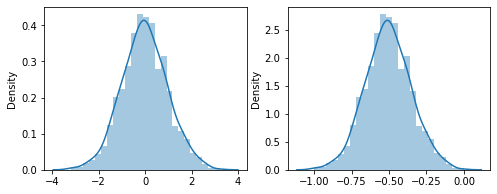

In [82]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(a1)
plt.subplot(1,2,2)
sns.distplot(a1_minmax)

* `a10`과 `a10_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


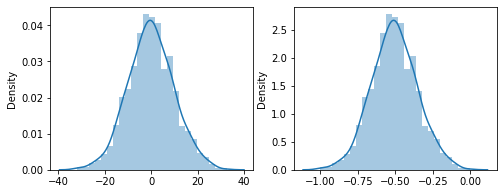

In [83]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(a10)
plt.subplot(1,2,2)
sns.distplot(a10_minmax)

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [90]:
print(a1.max()-a1.min())
print(a10.max()-a10.min())
# a1과 a10의 단위가 완전히 다르기 때문에 굉장히 큰 수 차이가 나는 것을 확인 할 수 있습니다.

0    6.452444
dtype: float64
64.52443845014308


* 스케일링 후 `a1_minmax`, `a10_minmax`의 분산 구하기

In [93]:
print(a1_minmax.var() , a10_minmax.var())

0    0.023514
dtype: float64 0.023490084144208716


#### **스케일링: z-score**

**standard(z-socre) scaling** : 최대값을 1로, 최소값을 0으로 스켕일링 하는  기법.

\begin{align}
\\
standard(x)=\frac{x-\mu}{\sigma}
\end{align}
\begin{align}
 & \\
 & x : ? \\
 & \mu : ?\\
 & \sigma : ?\\ 
\end{align}


* standard 함수 생성

In [100]:
import math
def standard(x):
    stan_a = x-np.mean(x)/np.std(x)
    return stan_a

* `a1`을 standard 하여 `a1_standard` 로 바인딩

In [102]:
a1_standard = standard(a1)

* `a10`을 standard 하여 `a10_standard` 로 바인딩

In [103]:
a10_standard = standard(a10)

* `a1`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


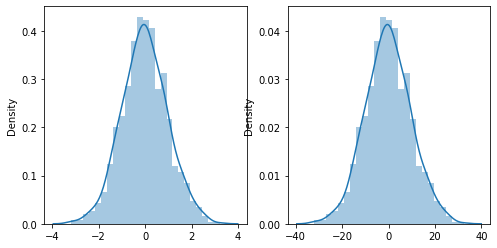

In [107]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.distplot(a1)
plt.subplot(1,2,2)
sns.distplot(a10_standard)

* `a10`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


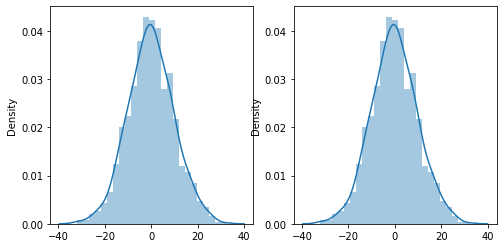

In [108]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.distplot(a10)
plt.subplot(1,2,2)
sns.distplot(a10_standard)

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [110]:
print(a1.max()-a1.min(), a10.max()-a10.min())

0    6.452444
dtype: float64 64.52443845014308


* 스케일링 후 `a1_standard`, `a10_standard`의 분산 구하기

In [112]:
a1_standard.var(), a10_standard.var()

(0    0.978966
 dtype: float64, 97.79869049138931)

### **| 범위와 사분위 범위**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0305-01.png?raw=true?raw=true width=800>
</p>


* `a10` 의 분포 그리기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


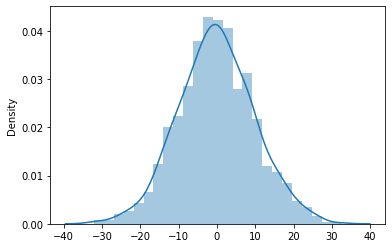

In [113]:
sns.distplot(a10)

#### **범위**

\begin{align}
\\
범위 = max(x)-min(x)
\end{align}

```
np.ptp(x)
```

* `a10`의 범위 구하기

In [115]:
# np.ptp 사용
print(np.ptp(a10))
# max-min 사용
print(a10.max()-a10.min())

64.52443845014308
64.52443845014308



#### **사분위 범위**

\begin{align}
\\
사분위 범위 = 3사분위수 - 1사분위수 = 하위 75 \% 수 - 하위 25\% 수
\end{align}

```
np.quntile(x, percent)
```

* `a10`의 사분위 범위 구하기

In [117]:
np.quantile(x,0.25), np.quantile(x,0.75)

(2.0, 4.0)